In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## starting with the inputs

In [5]:
## enter the values in order(all in SI units): length, YoungModulus, A0, nodes, elements, availNodes, fixedNode, force

In [9]:
inputs_list = dict() 
for i in range(8):
    data = input('Enter key & value separated by ":", ') 
    temp = data.split(':') 
    inputs_list[temp[0]] = temp[1] 
print()
# Displaying the dictionary 
for key, value in inputs_list.items(): 
    inputs_list[key] = float(value)
    print(f'Key: {key}, Value: {value}') 
print(inputs_list)

Enter key & value separated by ":", length:0.5
Enter key & value separated by ":", YoungModulus:70e9
Enter key & value separated by ":", A0:0.00125
Enter key & value separated by ":", elements:2
Enter key & value separated by ":", nodes:3
Enter key & value separated by ":", availNodes:2
Enter key & value separated by ":", fixedNode:1
Enter key & value separated by ":", force:-5000

Key: length, Value: 0.5
Key: YoungModulus, Value: 70e9
Key: A0, Value: 0.00125
Key: elements, Value: 2
Key: nodes, Value: 3
Key: availNodes, Value: 2
Key: fixedNode, Value: 1
Key: force, Value: -5000
{'length': 0.5, 'YoungModulus': 70000000000.0, 'A0': 0.00125, 'elements': 2.0, 'nodes': 3.0, 'availNodes': 2.0, 'fixedNode': 1.0, 'force': -5000.0}


In [10]:
type(inputs_list['length'])

float

In [11]:
t=np.array([[1,-1],[-1,1]])

In [12]:
t

array([[ 1, -1],
       [-1,  1]])

In [13]:
import numpy
elementalLength = inputs_list['length'] / (int(inputs_list['elements']))
nodesPosi = [i * elementalLength  for i in range(int(inputs_list['elements'])+1)]
nodesPosi= numpy.transpose(nodesPosi).reshape(-1,1)

In [14]:
nodesPosi

array([[0.  ],
       [0.25],
       [0.5 ]])

In [15]:
inputs_list['nodes'] = int(inputs_list['nodes'])

In [16]:
## global stiffness matrix, force arrangement
kg=np.zeros((inputs_list['nodes'], inputs_list['nodes']))
u = np.zeros((inputs_list['nodes'],1))
F = np.zeros((inputs_list['nodes'],1))
F[0]= inputs_list['force']
FE= F[:int(inputs_list['elements']),:int(inputs_list['elements'])]

In [17]:
## description of the problem

In [23]:
area = inputs_list['A0']
K = ( inputs_list['A0']* inputs_list['YoungModulus'] /elementalLength ) * t
for i in range(int(inputs_list['elements'])):
    print(i)
    x = i
    idx = [i, i + 1]
    kg[np.ix_(idx, idx)] += K
print(K)
print('Global Stiffness Matrix is:')
print(kg) 

0
1
[[ 3.5e+08 -3.5e+08]
 [-3.5e+08  3.5e+08]]
Global Stiffness Matrix is:
[[ 1.75e+09 -1.75e+09  0.00e+00]
 [-1.75e+09  3.50e+09 -1.75e+09]
 [ 0.00e+00 -1.75e+09  1.75e+09]]


In [136]:
def problem_case():
    # asking about the test case
    info = input("Is the problem based on uniform cross secional area (Y/N): ")
    if(info == 'Y'):
        area = inputs_list['A0']
        K = ( inputs_list['A0']* inputs_list['YoungModulus'] /elementalLength ) * t
        for i in range(int(inputs_list['elements'])):
            x = i
            idx = [i, i + 1]
            kg[np.ix_(idx, idx)] += K
        print('Global Stiffness Matrix is:')
        print(kg)
        KGE= kg[:int(inputs_list['elements']),:int(inputs_list['elements'])]
        uE = np.linalg.solve(KGE, FE)
        u[:int(inputs_list['elements'])]=uE
       # U1=u.reshape(-1,1)
        print('Numerical deflection matrix is:')
        print(u)
        ReactionForce = np.dot(kg[int(inputs_list['elements'])], u)
        print(f'Reaction force at x=L is: {ReactionForce}')
       
    ## Analytical solution
        u1a_x = []
        for i in nodesPosi:
            val = 5000*(i-inputs_list['length'])/(inputs_list['YoungModulus']*inputs_list['A0'])
            u1a_x.append(val)
        u1a_x_array = np.array(u1a_x).reshape(-1, 1)
        print('Analytical deflection matrix is:')
        print(u1a_x_array)
           # u1a_x = np.array(u1a_x).reshape(-1,1)
            
            
        
    ## plotting analytical vs numerical
        x = nodesPosi
        y1 = u1a_x_array
        y2 = u
        z = u-u1a_x_array
        figure,axes = plt.subplots(2,1)
       # axes[0] = fig.add_axes([0,0,1,1])
        axes[0].plot(x,y1,color="green",lw=2,ls="--",marker='o',markersize=3,label='analytical')
        axes[0].plot(x,y2,color="red",lw=2,ls="-",marker='+',markersize=7,label='numerical')
        plt.xlabel("nodal locations ")
        plt.ylabel("Magnitude")
     #   plt.title("Analytical vs Numerical",pad=10)
        axes[0].legend()
       # axes[1] = fig.add_axes([0,0,1,1])
        axes[1].plot(x,z,color="green",lw=2,ls="--",marker='o',markersize=5,label='norm(uN-uA)')
        plt.xlabel("nodal locations ")
        plt.ylabel("Magnitude")
     #   plt.title("uN-uA")
        axes[1].legend()


    elif(info == 'N'):
        for i in range(int(inputs_list['elements'])):
            x = i
            A_x =  inputs_list['A0']* (1 + ((nodesPosi[x] + nodesPosi[x+1]) / (2 * inputs_list['length'])))
            print(f"A_x({x}) = {A_x}")
    
            K = (A_x * inputs_list['YoungModulus'] /elementalLength ) * t
            print(f"K({x}) =\n{K}")
            idx = [i, i + 1]
            kg[np.ix_(idx, idx)] += K
            
        print('Global Stiffness Matrix is:')
        print(kg)
        KGE= kg[:int(inputs_list['elements']),:int(inputs_list['elements'])]
        uE = np.linalg.solve(KGE, FE)
        u[:int(inputs_list['elements'])]=uE
        print('Numerical deflection matrix is:')
        print(u)
        ReactionForce = np.dot(kg[int(inputs_list['elements'])], u)
        print(f'Reaction force at x=L is: {ReactionForce}')      
       
    ## Analytical solution
        u2a_x = []
        for i in nodesPosi:
            valu = (5000*inputs_list['length']*np.log((inputs_list['length']+i)/(2*inputs_list['length'])))/(inputs_list['YoungModulus']*inputs_list['A0'])
            u2a_x.append(valu)
        u2a_x_array = np.array(u2a_x).reshape(-1, 1)
        print('Analytical deflection matrix is:')
        print(u2a_x_array)
        
       
    ## plotting analytical vs numerical
        x = nodesPosi
        y1 = u2a_x_array
        y2 = u
        z = u-u2a_x_array
        figure,axes = plt.subplots(2,1)
        #axes[0] = fig.add_axes([0,0,1,1])
        axes[0].plot(x,y1,color="green",lw=2,ls="--",marker='o',markersize=5,label='analytical')
        axes[0].plot(x,y2,color="red",lw=2,ls="-",marker='+',markersize=7,label='numerical')
        plt.xlabel("nodal locations ")
        plt.ylabel("Magnitude")
      #  plt.title("Analytical vs Numerical",pad = 10)
        axes[0].legend()
       # axes[1] = fig.add_axes([0,0,1,1])
        axes[1].plot(x,z,color="green",lw=2,ls="--",marker='o',markersize=5,label='norm(uN-uA)')
        plt.xlabel("nodal locations ")
        plt.ylabel("Magnitude")
      #  plt.title("uN-uA")
        axes[1].legend()


Is the problem based on uniform cross secional area (Y/N): N
A_x(0) = [0.00126953]
K(0) =
[[ 5.6875e+09 -5.6875e+09]
 [-5.6875e+09  5.6875e+09]]
A_x(1) = [0.00130859]
K(1) =
[[ 5.8625e+09 -5.8625e+09]
 [-5.8625e+09  5.8625e+09]]
A_x(2) = [0.00134766]
K(2) =
[[ 6.0375e+09 -6.0375e+09]
 [-6.0375e+09  6.0375e+09]]
A_x(3) = [0.00138672]
K(3) =
[[ 6.2125e+09 -6.2125e+09]
 [-6.2125e+09  6.2125e+09]]
A_x(4) = [0.00142578]
K(4) =
[[ 6.3875e+09 -6.3875e+09]
 [-6.3875e+09  6.3875e+09]]
A_x(5) = [0.00146484]
K(5) =
[[ 6.5625e+09 -6.5625e+09]
 [-6.5625e+09  6.5625e+09]]
A_x(6) = [0.00150391]
K(6) =
[[ 6.7375e+09 -6.7375e+09]
 [-6.7375e+09  6.7375e+09]]
A_x(7) = [0.00154297]
K(7) =
[[ 6.9125e+09 -6.9125e+09]
 [-6.9125e+09  6.9125e+09]]
A_x(8) = [0.00158203]
K(8) =
[[ 7.0875e+09 -7.0875e+09]
 [-7.0875e+09  7.0875e+09]]
A_x(9) = [0.00162109]
K(9) =
[[ 7.2625e+09 -7.2625e+09]
 [-7.2625e+09  7.2625e+09]]
A_x(10) = [0.00166016]
K(10) =
[[ 7.4375e+09 -7.4375e+09]
 [-7.4375e+09  7.4375e+09]]
A_x(11) = [0.

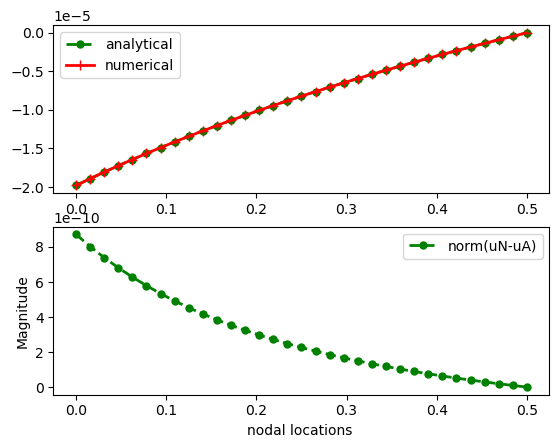

In [137]:
problem_case()